In [1]:
#Import all library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder


In [30]:
#Read the adatset
df_PE = pd.read_csv('PEA11.20231027T221019.csv')
df_PE.head()

,STATISTIC Label,Year,Single Year of Age,Sex,UNIT,VALUE
0,Population estimates from 1926,1926,All ages,Both sexes,Number,2971992
1,Population estimates from 1926,1926,All ages,Male,Number,1506889
2,Population estimates from 1926,1926,All ages,Female,Number,1465103
3,Population estimates from 1926,1926,Under 1 year,Both sexes,Number,55391
4,Population estimates from 1926,1926,Under 1 year,Male,Number,28084


In [31]:
#Checking the columns
df_PE.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11817 entries, 0 to 11816
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   STATISTIC Label     11817 non-null  object
 1   Year                11817 non-null  int64 
 2   Single Year of Age  11817 non-null  object
 3   Sex                 11817 non-null  object
 4   UNIT                11817 non-null  object
 5   VALUE               11817 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 554.0+ KB


In [32]:
#Shape of dataset
df_PE.shape

(11817, 6)

In [33]:
#Checking the null values
df_PE.isnull().sum()

STATISTIC Label       0
Year                  0
Single Year of Age    0
Sex                   0
UNIT                  0
VALUE                 0
dtype: int64

In [34]:
#Statistical Description of dataset
df_PE.describe()

,Year,VALUE
count,11817.000000,1.181700e+04
mean,1996.410256,5.352461e+04
std,24.463165,2.867754e+05
min,1926.000000,6.000000e+00
25%,1986.000000,1.242700e+04
50%,2004.000000,2.667500e+04
75%,2014.000000,3.557700e+04
max,2023.000000,5.281612e+06


In [36]:
# Creating a new feature 'Age Group'
df_PE['Age Group'] = df_PE['Single Year of Age'].apply(lambda x: 'Under 1 year' if x == 'Under 1 year' else 'All ages')

# Print updated dataset with new feature
print("\nUpdated Dataset with 'Age Group' Feature:")
print(df_PE)



Updated Dataset with 'Age Group' Feature:
                      STATISTIC Label  Year Single Year of Age         Sex  \
0      Population estimates from 1926  1926           All ages  Both sexes   
1      Population estimates from 1926  1926           All ages        Male   
2      Population estimates from 1926  1926           All ages      Female   
3      Population estimates from 1926  1926       Under 1 year  Both sexes   
4      Population estimates from 1926  1926       Under 1 year        Male   
...                               ...   ...                ...         ...   
11812  Population estimates from 1926  2023           98 years        Male   
11813  Population estimates from 1926  2023           98 years      Female   
11814  Population estimates from 1926  2023  99 years and over  Both sexes   
11815  Population estimates from 1926  2023  99 years and over        Male   
11816  Population estimates from 1926  2023  99 years and over      Female   

         UNIT    VAL

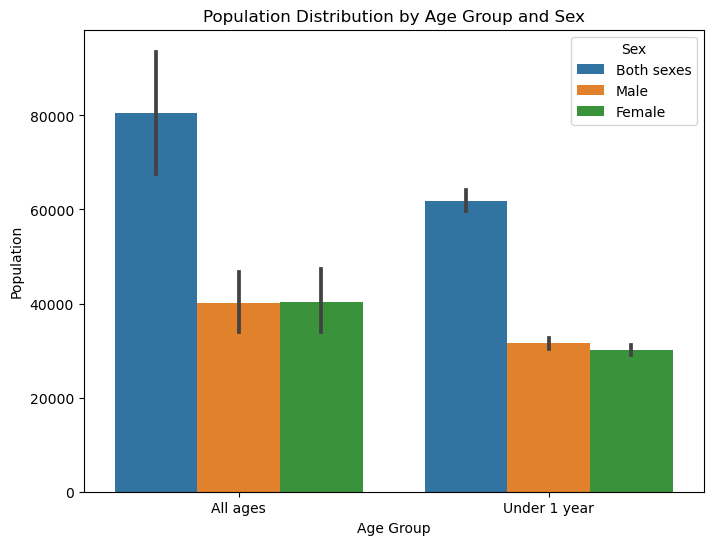

In [37]:
# Population distribution by 'Age Group' and 'Sex'
plt.figure(figsize=(8, 6))
sns.barplot(x='Age Group', y='VALUE', hue='Sex', data=df_PE)
plt.title('Population Distribution by Age Group and Sex')
plt.xlabel('Age Group')
plt.ylabel('Population')
plt.show()

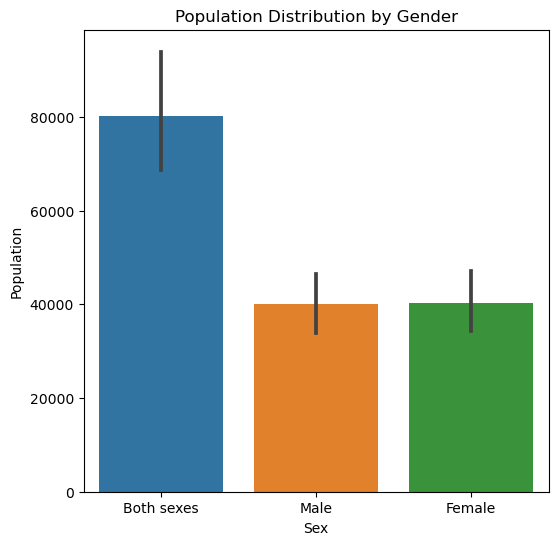

In [38]:
# Population distribution by 'Sex'
plt.figure(figsize=(6, 6))
sns.barplot(x='Sex', y='VALUE', data=df_PE)
plt.title('Population Distribution by Gender')
plt.xlabel('Sex')
plt.ylabel('Population')
plt.show()


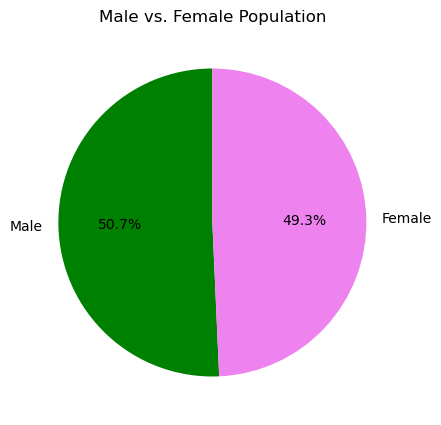

In [39]:
# Extracting male and female population for 'All ages' category
male_population = df_PE.loc[(df_PE['Single Year of Age'] == 'All ages') & (df_PE['Sex'] == 'Male'), 'VALUE'].values[0]
female_population = df_PE.loc[(df_PE['Single Year of Age'] == 'All ages') & (df_PE['Sex'] == 'Female'), 'VALUE'].values[0]
populations = [male_population, female_population]
genders = ['Male', 'Female']
colors = ['green', 'violet']  # Custom colors for Male and Female 

#  pie chart 
plt.figure(figsize=(5, 5))
plt.pie(populations, labels=genders, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Male vs. Female Population')
plt.show()

In [40]:
# Convert categorical columns to numerical using Label Encoding
le = LabelEncoder()
df_PE['Sex'] = le.fit_transform(df_PE['Sex'])
df_PE['STATISTIC Label'] = le.fit_transform(df_PE['STATISTIC Label'])
df_PE['Single Year of Age'] = le.fit_transform(df_PE['Single Year of Age'])
df_PE['UNIT'] = le.fit_transform(df_PE['UNIT'])

In [41]:
#First 5 rows of dataset
df_PE.head()

,STATISTIC Label,Year,Single Year of Age,Sex,UNIT,VALUE,Age Group
0,0,1926,99,0,0,2971992,All ages
1,0,1926,99,2,0,1506889,All ages
2,0,1926,99,1,0,1465103,All ages
3,0,1926,100,0,0,55391,Under 1 year
4,0,1926,100,2,0,28084,Under 1 year
